In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

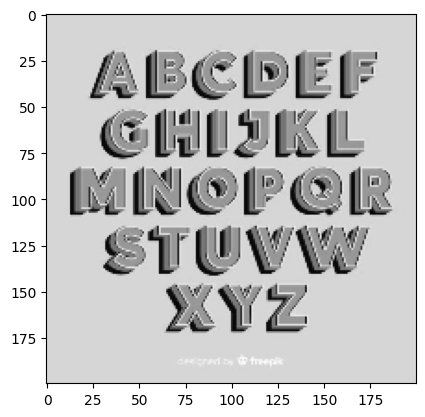

In [70]:
img = cv2.imread('A-Z.jpg')
img = cv2.resize(img,(200,200))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255

plt.imshow(img_gray, cmap='gray')
plt.show()



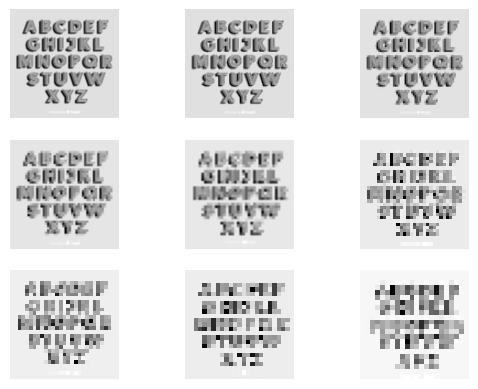

In [71]:


class Conv2d:
    def __init__(self, input, kernelSize=3, padding = 0, stride = 1):
        self.input = np.pad(input, ((padding,padding),(padding,padding)),'constant')
        self.stride = stride
        self.kernel = np.random.randn( kernelSize, kernelSize)

        # print(self.kernel)

        self.result = np.zeros((int((self.input.shape[0] - self.kernel.shape[0])/self.stride) +1,
                               int((self.input.shape[1] - self.kernel.shape[1])/self.stride) +1))

    def getROI(self):
        for row in range(int((self.input.shape[0] - self.kernel.shape[0])/self.stride) +1):
            for col in range(int((self.input.shape[1] - self.kernel.shape[1])/self.stride) +1):
                roi = self.input[row*self.stride: row*self.stride + self.kernel.shape[0],
                                 col*self.stride: col*self.stride + self.kernel.shape[1]]
                yield row, col, roi
        
    def operate(self):
        for row, col, roi in self.getROI():
            self.result[row,col] = np.sum(roi + self.kernel)
    
        return self.result


for i in range(9):
    conv2d = Conv2d(img_gray,stride=i+1)
    img_gray_conv2d = conv2d.operate()

    plt.subplot(3,3,i+1)
    plt.imshow(img_gray_conv2d, cmap='gray')
    plt.axis('off')

plt.show()

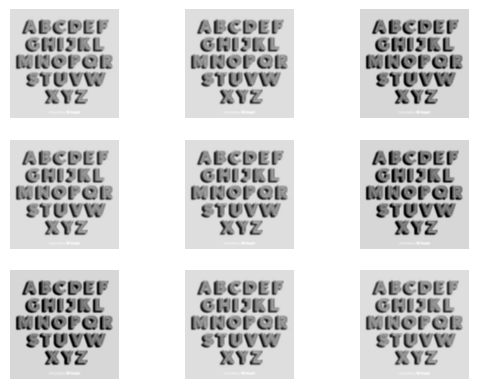

In [72]:
class Relu:
    def __init__(self, input):
        self.input = input
        self.result = np.zeros((self.input.shape[0], self.input.shape[1]))

    def operation(self):
        for row in range(self.input.shape[0]):
            for col in range(self.input.shape[1]):
                self.result[row,col] = 0 if self.input[row,col]  < 0 else self.input[row,col]

        return self.result

for i in range(9):
    conv2d = Conv2d(img_gray)
    img_gray_conv2d = conv2d.operate()

    relu = Relu(img_gray_conv2d)
    img_gray_conv2d_relu = relu.operation()

    plt.subplot(3,3,i+1)
    plt.imshow(img_gray_conv2d_relu, cmap='gray')
    plt.axis('off')

plt.show()